In [114]:
import pandas as pd

dfp = pd.read_excel(r"C:\Users\kian3\OneDrive - KU Leuven\Documents\lessen\MDA\Project\cordis-HORIZONprojects-xlsx\project.xlsx")
dfo = pd.read_excel(r"C:\Users\kian3\MDA\Project\cordis-HORIZONprojects-xlsx\organization.xlsx")
dfoutput = pd.read_excel(r"C:\Users\kian3\MDA\Project\project_output.xlsx")

In [131]:
# One to one merge dfp and df_full_output
newdf = dfp.merge(dfoutput, on="id")
### One to many merge newdf and dfo, excpect 100249 rows in fulldf
fulldf = newdf.merge(dfo, left_on="id", right_on="projectID", validate="one_to_many")

In [132]:
print(fulldf.info())
# Delete active and nature (empty)
fulldf = fulldf.drop(columns=["active", "nature"])
# Drop col's based on initial exploration (old exploration files)
fulldf = fulldf.drop(columns=["acronym", "title", "totalCost_x", "topics", "objective_x", "rcn_x", "grantDoi", "contentUpdateDate_x", \
                              "projectID", "projectAcronym", "organisationID", "vatNumber", "name", "shortName", "street", "postCode", \
                              "city", "geolocation", "organizationURL", "contactForm","contentUpdateDate_y", "rcn_y", "totalCost_y", \
                              "ecContribution", "netEcContribution", "ecSignatureDate", \
                              "masterCall", "subCall", "frameworkProgramme", "status"
                            ])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100249 entries, 0 to 100248
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   100249 non-null  int64  
 1   acronym              100249 non-null  object 
 2   status               100249 non-null  object 
 3   title                100249 non-null  object 
 4   startDate            100249 non-null  object 
 5   endDate              100249 non-null  object 
 6   totalCost_x          100249 non-null  object 
 7   ecMaxContribution    100249 non-null  object 
 8   legalBasis           100249 non-null  object 
 9   topics               100249 non-null  object 
 10  ecSignatureDate      100231 non-null  object 
 11  frameworkProgramme   100249 non-null  object 
 12  masterCall           100249 non-null  object 
 13  subCall              100249 non-null  object 
 14  fundingScheme        100248 non-null  object 
 15  nature           

In [133]:
# Give right structure to funding variable
fulldf["ecMaxContribution"] = fulldf["ecMaxContribution"].str.replace(',', '.', regex=False).astype(float)
# Give 0/1 to MSE, assuming missing MSE means not MSE
fulldf["SME"] = fulldf["SME"].astype(bool)
fulldf["SME"] = fulldf["SME"].astype(int)
# Convert start and end date to datetime
fulldf["startDate"] = pd.to_datetime(fulldf["startDate"])
fulldf["endDate"] = pd.to_datetime(fulldf["endDate"])

In [134]:
# Check missings for self made col's. Still missings for 3 projects (even after correction scientific domain, see old exploration files)
# These are the projects with id 101149703, 101101973 and 101041246
# Manually changed NA country (Namibia) to NAM such that python does not interpret it as a missing value (see old exploration files)
# For other missings countries, we mannualy changed them to the right country code by manually filling in based on city or organisation name (see old exploration files)
import missingno as msno
sorted_NAs = msno.nullity_sort(fulldf, sort='ascending')
print(sorted_NAs.head(100))
fulldf_C = fulldf[~fulldf["id"].isin([101149703, 101101973, 101041246])]

# Check for missings self made col's after removal of 3 projects
## List of all projects than above with a missing scientific_domain
missing_scientific_domain = fulldf_C[fulldf_C["scientific_domain"].isna()]
print("Project IDs with missing scientific_domain:", missing_scientific_domain["id"].unique())
## Main topics
missing_main_topics = fulldf_C[fulldf_C["main_topics"].isna()]
print("Project IDs with missing main_topics:", missing_main_topics["id"].unique())
## Expected impact
missing_expected_impact = fulldf_C[fulldf_C["expected_impact"].isna()]
print("Project IDs with missing expected_impact:", missing_expected_impact["id"].unique())
## Sustainability
missing_sustainability = fulldf_C[fulldf_C["sustainability"].isna()]
print("Project IDs with missing sustainability:", missing_sustainability["id"].unique())
## Problem type
missing_problem_type = fulldf_C[fulldf_C["problem_type"].isna()]
print("Project IDs with missing problem_type:", missing_problem_type["id"].unique())

# Spotted missing on fundingscheme (used as a feature in the model), looks like belonging to a EURATOM scheme but don't know which one
# -> left it out 
missing_funding_scheme = fulldf_C[fulldf_C["fundingScheme"].isna()]
print("Project IDs with missing fundingScheme:", missing_funding_scheme["id"].unique())
fulldf_C = fulldf_C[fulldf_C["fundingScheme"].notna()]
missing_funding_scheme_after = fulldf_C[fulldf_C["fundingScheme"].isna()]
print("Project IDs with missing fundingScheme after removal:", missing_funding_scheme_after["id"].unique())

# Control for missings on country after manual adaption, no missings left
missing_scientific_domain = fulldf_C[fulldf_C["country"].isna()]
unique_combinations = missing_scientific_domain[['id', 'order']].drop_duplicates()
print(unique_combinations)
print(len(unique_combinations))

              id  startDate    endDate  ecMaxContribution   legalBasis  \
46924  101149703 2024-09-01 2026-08-31          195914.88  HORIZON.1.2   
80782  101101973 2022-12-01 2026-09-30        37875973.46  HORIZON.2.5   
80783  101101973 2022-12-01 2026-09-30        37875973.46  HORIZON.2.5   
80760  101101973 2022-12-01 2026-09-30        37875973.46  HORIZON.2.5   
80762  101101973 2022-12-01 2026-09-30        37875973.46  HORIZON.2.5   
...          ...        ...        ...                ...          ...   
2350   101129626 2024-02-01 2026-01-31         1499992.50  HORIZON.2.4   
2347   101092944 2023-01-01 2025-12-31         4911425.00  HORIZON.2.4   
2743   101082732 2022-11-01 2025-10-31         2853249.00  HORIZON.2.4   
2825   101178074 2024-11-01 2028-10-31        11939105.26  HORIZON.2.4   
3327   101178170 2025-01-01 2027-12-31         2972396.25  HORIZON.2.2   

                fundingScheme  \
46924  HORIZON-TMA-MSCA-PF-EF   
80782           HORIZON-JU-IA   
80783       

In [135]:
# Feature engineering based on project and organization datasets of the CORDIS database

fulldf = fulldf_C.copy()
fulldf = fulldf.reset_index(drop=True)
## Made feature expected duration project in days
import datetime
fulldf["startDate"] = fulldf["startDate"].astype("object")
fulldf["endDate"] = fulldf["endDate"].astype("object")
lengths = []
for i in range(len(fulldf)):
    start_date = fulldf.loc[i, "startDate"]
    end_date = fulldf.loc[i, "endDate"]
    
    if isinstance(start_date, str):
        start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    if isinstance(end_date, str):
        end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')
    
    length = (end_date - start_date).days
    lengths.append(length)

fulldf["project_length_days"] = lengths


## Feature; number of organizations per project
fulldf['number_of_organizations'] = fulldf.groupby('id')['id'].transform('count')

## Feature; proportion of SMEs per project
fulldf['number_of_small_and_medium_orgs'] = fulldf.groupby('id')['SME'].transform('sum')
fulldf['proportion_of_small_and_medium_orgs'] = fulldf['number_of_small_and_medium_orgs'] / fulldf['number_of_organizations']

## Drop columns that are not needed anymore
fulldf = fulldf.drop(columns=["SME", "nutsCode", "activityType", "endOfParticipation", "order", "role", "number_of_small_and_medium_orgs"])


In [136]:
# Make columns for main_topics 
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer

# MultiLabelBinarizer for main_topics with grouping
mlb_topics = MultiLabelBinarizer(sparse_output=True)
fulldf['main_topics'] = fulldf['main_topics'].apply(
    lambda x: [str(i).lower() for i in (literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)]
    if isinstance(x, (str, list)) else []
)

# Calculate frequency of each topic
all_topics = [topic for sublist in fulldf['main_topics'] for topic in sublist]
topic_counts = pd.Series(all_topics).value_counts()
total_count = len(all_topics)

# Define a frequency threshold (e.g., 0.1%)
threshold = 0.001
infrequent_topics = topic_counts[topic_counts / total_count < threshold].index.tolist()

# Replace infrequent topics with "other"
fulldf['main_topics'] = fulldf['main_topics'].apply(
    lambda topics: [topic if topic not in infrequent_topics else "other" for topic in topics]
)

# Apply MultiLabelBinarizer
topic_labels = mlb_topics.fit_transform(fulldf['main_topics'])
topic_columns = [f'topic_{label.replace(' ', '_').replace('-', '_')}' for label in mlb_topics.classes_]
topic_df = pd.DataFrame.sparse.from_spmatrix(topic_labels, columns=topic_columns)

fulldf = pd.concat([fulldf, topic_df], axis=1)

## Make columns for expected_impact
mlb_impact = MultiLabelBinarizer(sparse_output=True)

# Function to safely parse and lowercase the impact strings
def parse_impact(x):
    if isinstance(x, str):
        x = x.strip() # Remove any leading/trailing whitespace
        if x.startswith('[') and x.endswith(']'):
            try:
                # Safely evaluate string representation of a list
                return [str(i).lower() for i in literal_eval(x)]
            except (ValueError, SyntaxError):
                # Fallback if literal_eval fails (e.g., malformed list string)
                return [x.lower()] if x else []
        elif x == 'Confidential':
            return [] # Treat 'Confidential' as no specific impact
        else:
            # For single words like 'societal' or 'technological'
            return [x.lower()] if x else []
    elif isinstance(x, list):
        # If it's already a list, just lowercase elements
        return [str(i).lower() for i in x]
    else:
        return [] # Handle any other unexpected types

fulldf['expected_impact_processed'] = fulldf['expected_impact'].apply(parse_impact)

# Fit and transform with MultiLabelBinarizer
impact_labels = mlb_impact.fit_transform(fulldf['expected_impact_processed'])

# Create column names, ensuring they are valid and descriptive
impact_columns = [f'impact_{label.replace(" ", "_").replace("-", "_").lower()}' for label in mlb_impact.classes_]
impact_df = pd.DataFrame.sparse.from_spmatrix(impact_labels, columns=impact_columns)
fulldf = pd.concat([fulldf, impact_df], axis=1)


## Make col's for continents involved in the project
country_to_continent = {
    'AD': 'Europe', 'AE': 'Asia', 'AF': 'Asia', 'AG': 'North America',
    'AI': 'North America', 'AL': 'Europe', 'AM': 'Asia', 'AO': 'Africa',
    'AQ': 'Antarctica', 'AR': 'South America', 'AS': 'Oceania', 'AT': 'Europe',
    'AU': 'Oceania', 'AW': 'North America', 'AX': 'Europe', 'AZ': 'Asia',
    'BA': 'Europe', 'BB': 'North America', 'BD': 'Asia', 'BE': 'Europe',
    'BF': 'Africa', 'BG': 'Europe', 'BH': 'Asia', 'BI': 'Africa',
    'BJ': 'Africa', 'BL': 'North America', 'BM': 'North America', 'BN': 'Asia',
    'BO': 'South America', 'BQ': 'North America', 'BR': 'South America', 'BS': 'North America',
    'BT': 'Asia', 'BV': 'Antarctica', 'BW': 'Africa', 'BY': 'Europe',
    'BZ': 'North America', 'CA': 'North America', 'CC': 'Asia', 'CD': 'Africa',
    'CF': 'Africa', 'CG': 'Africa', 'CH': 'Europe', 'CI': 'Africa',
    'CK': 'Oceania', 'CL': 'South America', 'CM': 'Africa', 'CN': 'Asia',
    'CO': 'South America', 'CP': 'North America', 'CR': 'North America', 'CU': 'North America',
    'CV': 'Africa', 'CW': 'North America', 'CX': 'Asia', 'CY': 'Europe',
    'CZ': 'Europe', 'DE': 'Europe', 'DJ': 'Africa', 'DK': 'Europe',
    'DM': 'North America', 'DO': 'North America', 'DZ': 'Africa', 'EC': 'South America',
    'EE': 'Europe', 'EG': 'Africa', 'EH': 'Africa', "EL": "Europe", 'ER': 'Africa',
    'ES': 'Europe', 'ET': 'Africa', 'FI': 'Europe', 'FJ': 'Oceania',
    'FK': 'South America', 'FM': 'Oceania', 'FO': 'Europe', 'FR': 'Europe',
    'GA': 'Africa', 'GD': 'North America', 'GE': 'Asia', 'GF': 'South America',
    'GG': 'Europe', 'GH': 'Africa', 'GI': 'Europe', 'GL': 'North America',
    'GM': 'Africa', 'GN': 'Africa', 'GP': 'North America', 'GQ': 'Africa',
    'GS': 'Antarctica', 'GT': 'North America', 'GU': 'Oceania', 'GW': 'Africa',
    'GY': 'South America', 'HK': 'Asia', 'HM': 'Antarctica', 'HN': 'North America',
    'HR': 'Europe', 'HT': 'North America', 'HU': 'Europe', 'ID': 'Asia',
    'IE': 'Europe', 'IL': 'Asia', 'IM': 'Europe', 'IN': 'Asia',
    'IO': 'Asia', 'IQ': 'Asia', 'IR': 'Asia', 'IS': 'Europe',
    'IT': 'Europe', 'JE': 'Europe', 'JM': 'North America', 'JO': 'Asia',
    'JP': 'Asia', 'KE': 'Africa', 'KG': 'Asia', 'KH': 'Asia',
    'KI': 'Oceania', 'KM': 'Africa', 'KN': 'North America', 'KP': 'Asia',
    'KR': 'Asia', 'KW': 'Asia', 'KY': 'North America', 'KZ': 'Asia',
    'LA': 'Asia', 'LB': 'Asia', 'LC': 'North America', 'LI': 'Europe',
    'LK': 'Asia', 'LR': 'Africa', 'LS': 'Africa', 'LT': 'Europe',
    'LU': 'Europe', 'LV': 'Europe', 'LY': 'Africa', 'MA': 'Africa',
    'MC': 'Europe', 'MD': 'Europe', 'ME': 'Europe', 'MF': 'North America',
    'MG': 'Africa', 'MH': 'Oceania', 'MK': 'Europe', 'ML': 'Africa',
    'MM': 'Asia', 'MN': 'Asia', 'MO': 'Asia', 'MP': 'Oceania',
    'MQ': 'North America', 'MR': 'Africa', 'MS': 'North America', 'MT': 'Europe',
    'MU': 'Africa', 'MV': 'Asia', 'MW': 'Africa', 'MX': 'North America',
    'MY': 'Asia', 'MZ': 'Africa', 'NAM': 'Africa', 'NC': 'Oceania', 'NE': 'Africa',
    'NF': 'Oceania', 'NG': 'Africa', 'NI': 'North America', 'NL': 'Europe',
    'NO': 'Europe', 'NP': 'Asia', 'NR': 'Oceania', 'NU': 'Oceania',
    'NZ': 'Oceania', 'OM': 'Asia', 'PA': 'North America', 'PE': 'South America',
    'PF': 'Oceania', 'PG': 'Oceania', 'PH': 'Asia', 'PK': 'Asia',
    'PL': 'Europe', 'PM': 'North America', 'PN': 'Oceania', 'PR': 'North America',
    'PS': 'Asia', 'PT': 'Europe', 'PW': 'Oceania', 'PY': 'South America',
    'QA': 'Asia', 'RE': 'Africa', 'RO': 'Europe', 'RS': 'Europe',
    'RU': 'Europe', 'RW': 'Africa', 'SA': 'Asia', 'SB': 'Oceania',
    'SC': 'Africa', 'SD': 'Africa', 'SE': 'Europe', 'SG': 'Asia',
    'SH': 'Africa', 'SI': 'Europe', 'SJ': 'Europe', 'SK': 'Europe',
    'SL': 'Africa', 'SM': 'Europe', 'SN': 'Africa', 'SO': 'Africa',
    'SR': 'South America', 'SS': 'Africa', 'ST': 'Africa', 'SV': 'North America',
    'SX': 'North America', 'SY': 'Asia', 'SZ': 'Africa', 'TC': 'North America',
    'TD': 'Africa', 'TF': 'Antarctica', 'TG': 'Africa', 'TH': 'Asia',
    'TJ': 'Asia', 'TK': 'Oceania', 'TL': 'Asia', 'TM': 'Asia',
    'TN': 'Africa', 'TO': 'Oceania', 'TR': 'Asia', 'TT': 'North America',
    'TV': 'Oceania', 'TW': 'Asia', 'TZ': 'Africa', 'UA': 'Europe',
    'UG': 'Africa', 'UK': 'Europe', 'UM': 'Oceania', 'US': 'North America',
    'UY': 'South America', 'UZ': 'Asia', 'VA': 'Europe', 'VC': 'North America',
    'VE': 'South America', 'VG': 'North America', 'VI': 'North America', 'VN': 'Asia',
    'VU': 'Oceania', 'WF': 'Oceania', 'WS': 'Oceania', 'XK': 'Europe',
    'YE': 'Asia', 'YT': 'Africa', 'ZA': 'Africa', 'ZM': 'Africa',
    'ZW': 'Africa'
}
fulldf['continent'] = fulldf['country'].apply(lambda code: country_to_continent.get(code, 'Unknown'))

# Print frequency of each continent
print(fulldf["continent"].value_counts())

unique_continents_per_id = fulldf.groupby('id')['continent'].agg(lambda x: list(x.unique()))
fulldf['all_continents'] = fulldf['id'].map(unique_continents_per_id)

mlb_continents = MultiLabelBinarizer(sparse_output=True)

# Function to safely parse and lowercase the continent strings
def parse_continent_data(x):
    if isinstance(x, str):
        x = x.strip()
        if x.startswith('[') and x.endswith(']'):
            try:
                # Safely evaluate string representation of a list
                return [str(i).lower() for i in literal_eval(x)]
            except (ValueError, SyntaxError):
                # Fallback if literal_eval fails (e.g., malformed list string)
                # If a single string like "europe", treat it as a list of one
                return [x.lower()] if x else []
        else:
            # For single words like 'europe' or 'north america'
            return [x.lower()] if x else []
    elif isinstance(x, list):
        # If it's already a list, just lowercase elements
        return [str(i).lower() for i in x]
    # Handle NaN values explicitly if they could be present and you want a 'nan' category
    # If a NaN should be treated as an empty list, then:
    elif pd.isna(x): # Check for pandas NaN
        return []
    else:
        return [] # Handle any other unexpected types

# Apply the parsing function to your raw continent column
# Replace 'your_raw_continent_column_name' with the actual column name in fulldf
fulldf['continents_processed'] = fulldf['all_continents'].apply(parse_continent_data)

# Fit and transform with MultiLabelBinarizer
# This is where mlb_continents learns its classes_
continent_labels = mlb_continents.fit_transform(fulldf['continents_processed'])

# Create column names
# Ensure these names match the format used in your prediction app for UI selection
continents_columns = [f'continent_{label.replace(" ", "_").replace("-", "_").lower()}' for label in mlb_continents.classes_]
continents_df = pd.DataFrame.sparse.from_spmatrix(continent_labels, columns=continents_columns)

fulldf = pd.concat([fulldf, continents_df], axis=1)

continent
Europe           94294
Asia              2667
North America     1377
Africa            1171
South America      401
Oceania            246
Name: count, dtype: int64


In [137]:
## Now we have multiple duplicates for each project, one for each organization involved in the project
## We only keep the first row for each project, as the other rows only contain unused organization information
fulldf = fulldf.drop(columns=["startDate", "endDate", "main_topics", "expected_impact", "objective_y", "semantic_summary", "country", \
                              'expected_impact_processed', "all_continents", "continents_processed", "continent"])
fulldf["problem_type"] = fulldf["problem_type"].str.lower()
fulldf = fulldf.drop_duplicates(subset=["id"], keep="first")

In [138]:
fulldf.to_csv(r"C:\Users\kian3\MDA\Project\finalfulldf.csv", index=False)

count       15337.00
mean      2851862.26
std       8314489.94
min         46594.00
25%        211754.00
50%       1808750.00
75%       2999996.00
max     549442000.00
Name: ecMaxContribution, dtype: float64


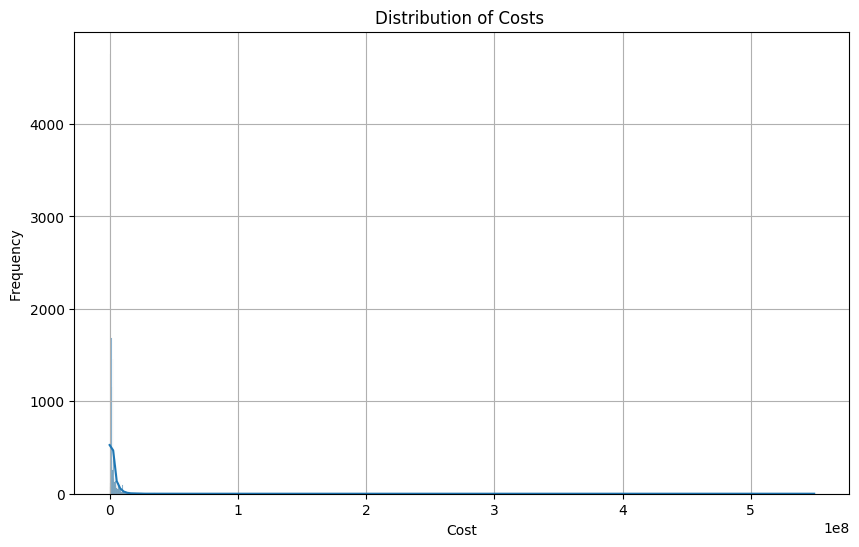

(15283, 136)


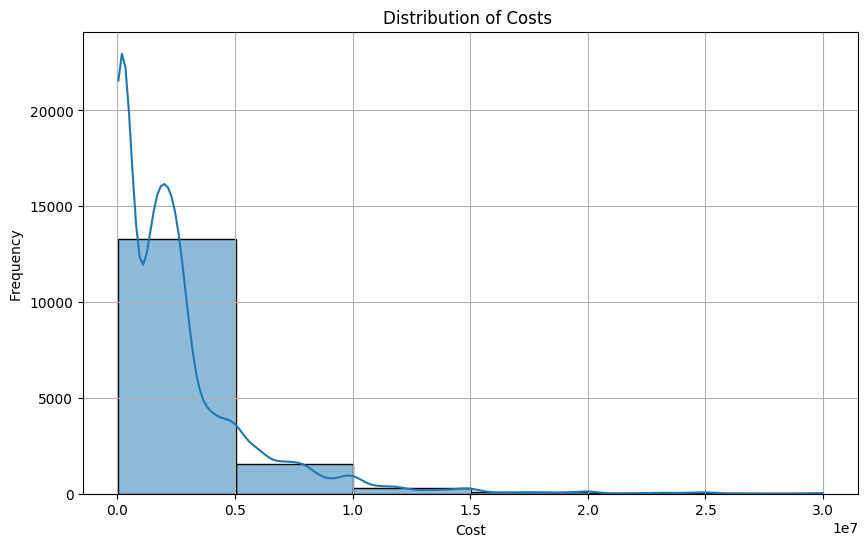

(13271, 136)


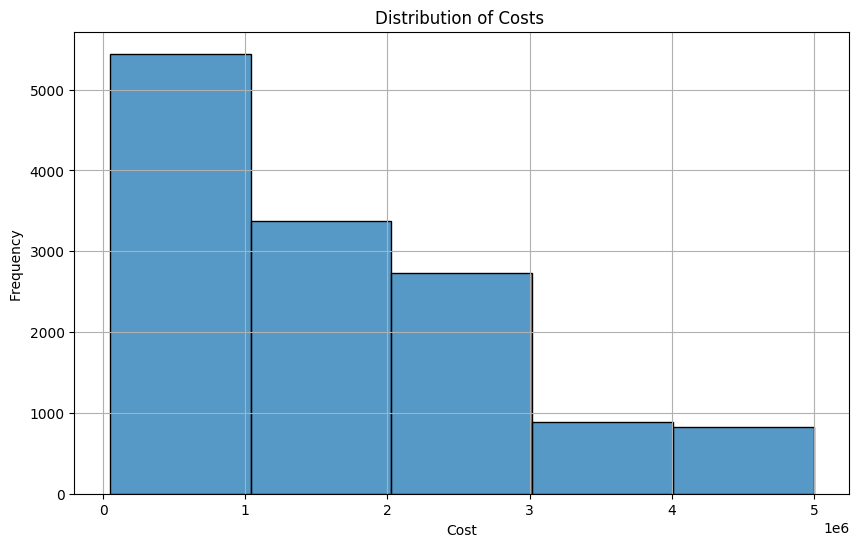

In [139]:
# Exploration of the final dataset

## Distribution ecMaxContribution
# Very high range, 46 594 to 549 442 000 
# Performed removal of outliers based on IQR method later
pd.set_option('display.float_format', '{:.2f}'.format)
print(fulldf["ecMaxContribution"].astype(int).describe())

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf['ecMaxContribution'], kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

# Only keep projects funding < 30 000 000 for now
# only 54 projects with funding > 30 000 000
# Biggest Majority of the projects have funding < 5000000
fulldf30 = fulldf[fulldf["ecMaxContribution"] < 30000000]
print(fulldf30.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf30['ecMaxContribution'], binwidth=5000000, kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

# Only keep projects funding < 5000000 for now
# Seems to be better for the ML training
fulldf5 = fulldf[fulldf["ecMaxContribution"] < 5000000]
print(fulldf5.shape)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fulldf5['ecMaxContribution'], binwidth=1000000)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

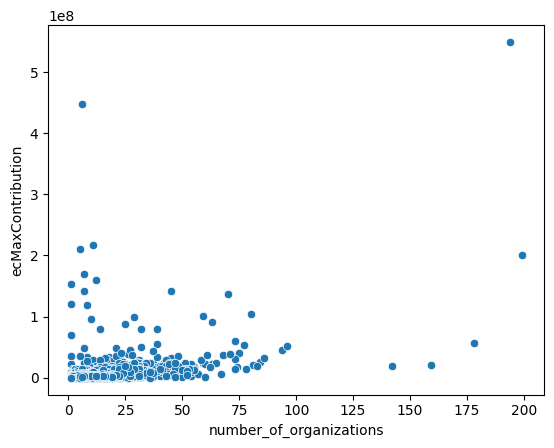

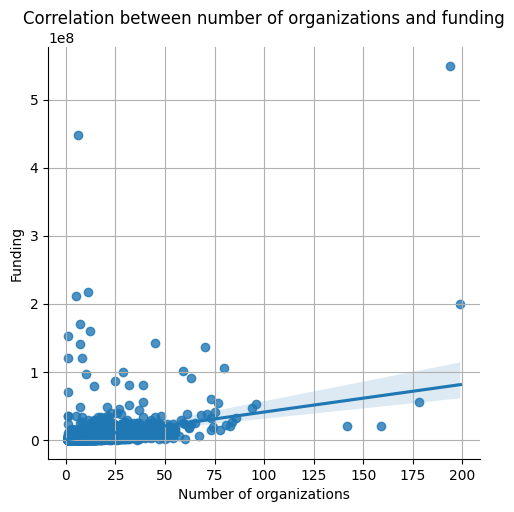

                         ecMaxContribution  number_of_organizations
ecMaxContribution                     1.00                     0.45
number_of_organizations               0.45                     1.00


In [140]:
# Exploration ecMaxContribution and number of organizations
sns.scatterplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="number_of_organizations", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between number of organizations and funding")
plt.xlabel("Number of organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["ecMaxContribution", "number_of_organizations"]].corr())

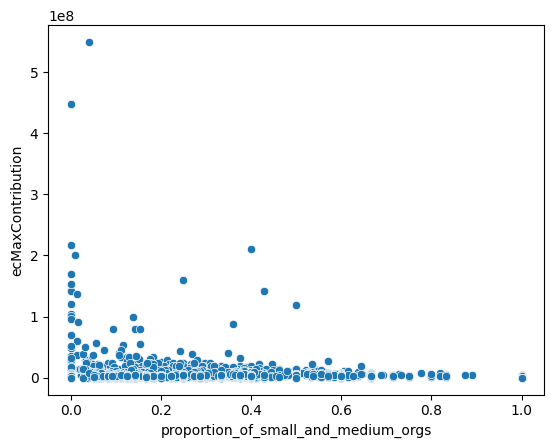

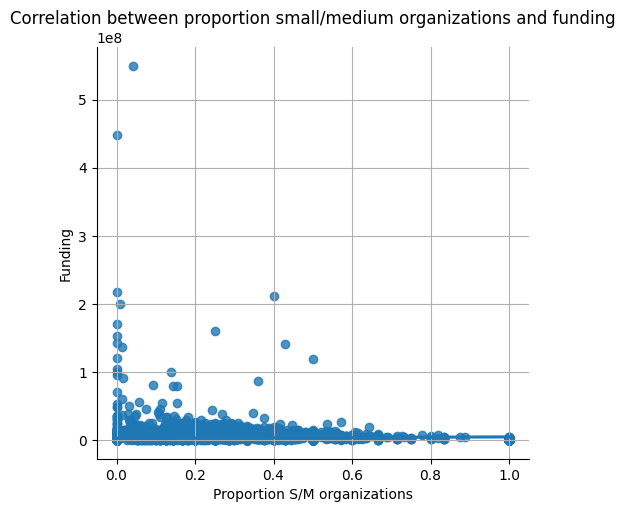

                                     proportion_of_small_and_medium_orgs  \
proportion_of_small_and_medium_orgs                                 1.00   
ecMaxContribution                                                   0.06   

                                     ecMaxContribution  
proportion_of_small_and_medium_orgs               0.06  
ecMaxContribution                                 1.00  


In [141]:
# Exploration proportion MSE and ecMaxContribution
sns.scatterplot(x="proportion_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="proportion_of_small_and_medium_orgs", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between proportion small/medium organizations and funding")
plt.xlabel("Proportion S/M organizations")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["proportion_of_small_and_medium_orgs", "ecMaxContribution"]].corr())

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None)


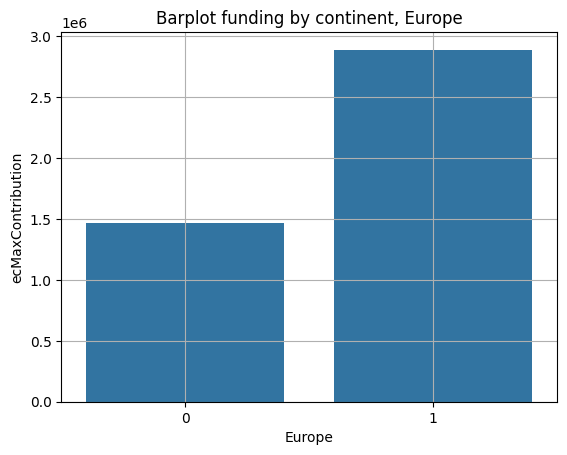

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None, estimator="median")


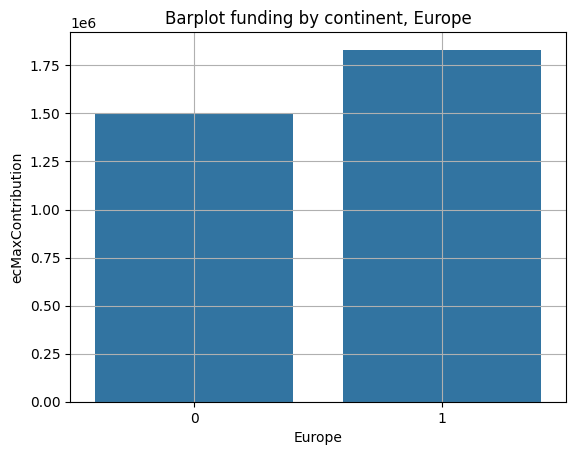

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None)


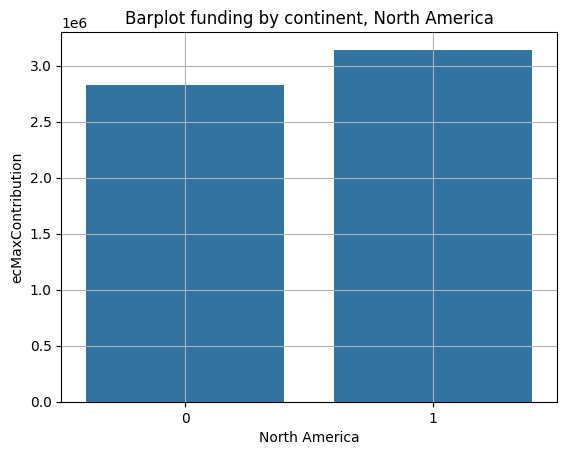

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None, estimator="median")


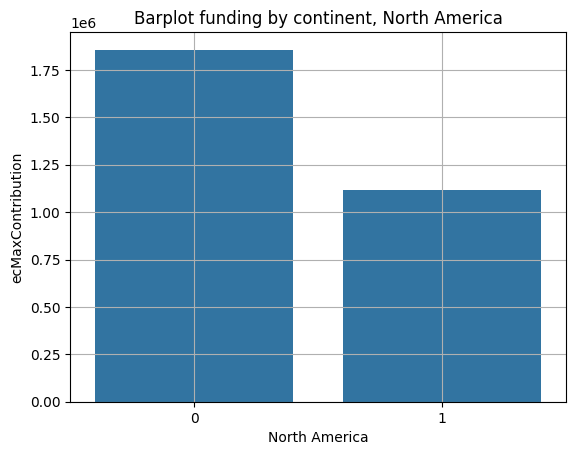

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_asia", y="ecMaxContribution", ci=None)


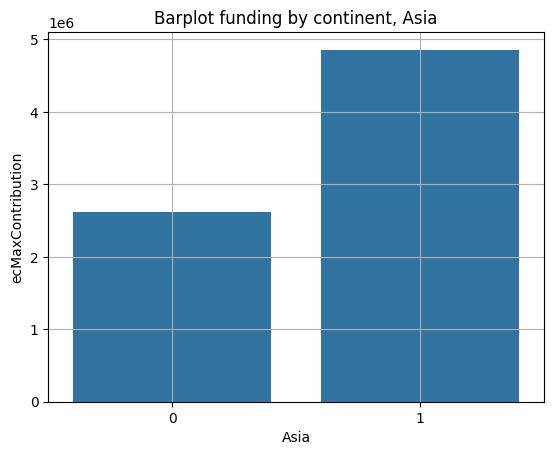

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_asia", y="ecMaxContribution", ci=None, estimator="median")


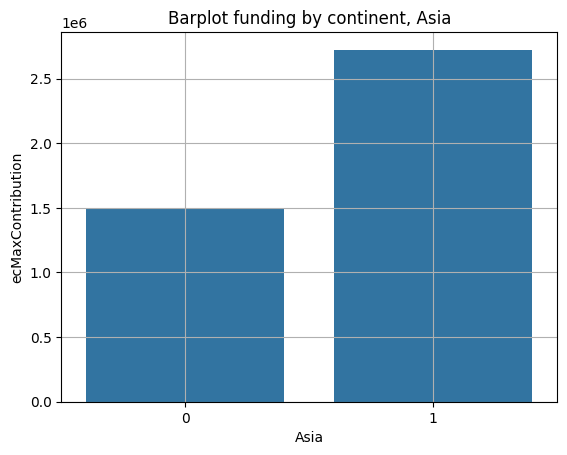

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_oceania", y="ecMaxContribution", ci=None)


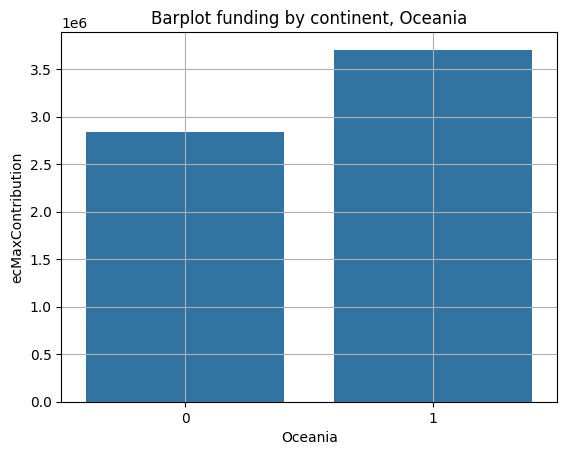

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_oceania", y="ecMaxContribution", ci=None, estimator="median")


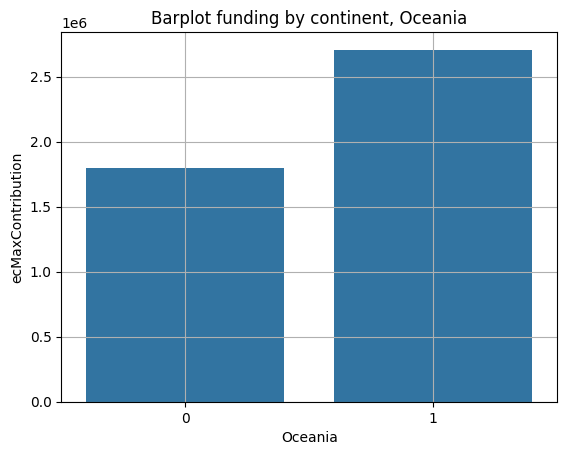

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_africa", y="ecMaxContribution", ci=None)


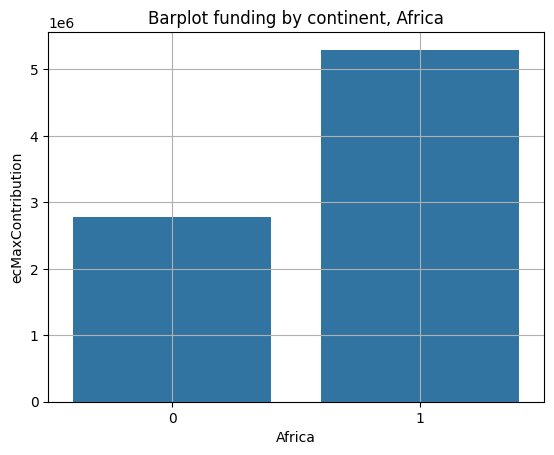

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_africa", y="ecMaxContribution", ci=None, estimator="median")


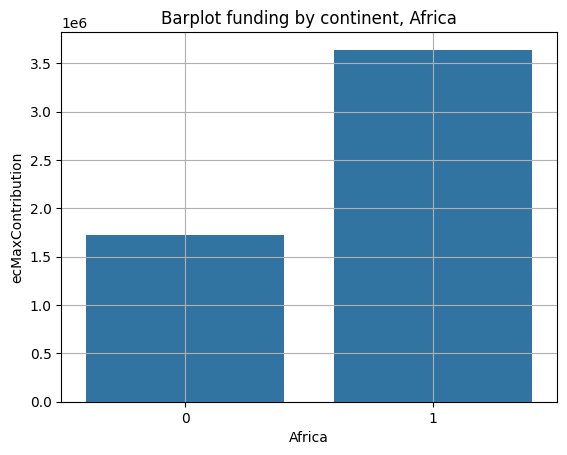

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_south_america", y="ecMaxContribution", ci=None)


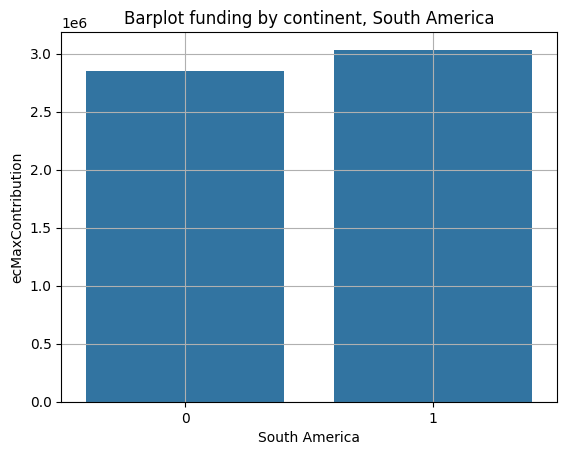

C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\489265850.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fulldf, x="continent_south_america", y="ecMaxContribution", ci=None, estimator="median")


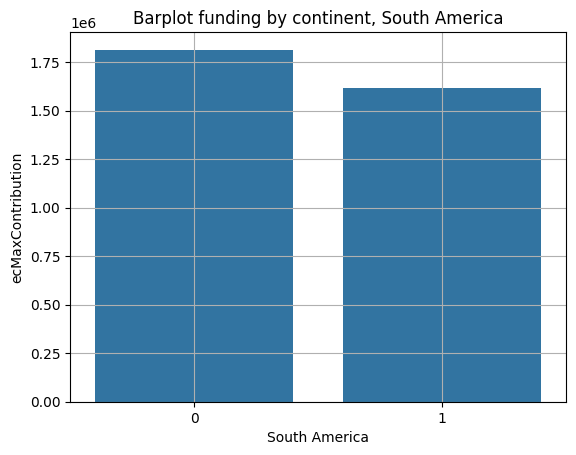

In [142]:
# Exploration continents and ecMaxContribution
## Europe
sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_europe", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Europe")
plt.xlabel("Europe")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## North America
sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_north_america", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, North America")
plt.xlabel("North America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## Asia
sns.barplot(data=fulldf, x="continent_asia", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Asia")
plt.xlabel("Asia")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_asia", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Asia")
plt.xlabel("Asia")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## Ociania
sns.barplot(data=fulldf, x="continent_oceania", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Oceania")
plt.xlabel("Oceania")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_oceania", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Oceania")
plt.xlabel("Oceania")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## Africa
sns.barplot(data=fulldf, x="continent_africa", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, Africa")
plt.xlabel("Africa")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_africa", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, Africa")
plt.xlabel("Africa")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

## South America
sns.barplot(data=fulldf, x="continent_south_america", y="ecMaxContribution", ci=None)
plt.title("Barplot funding by continent, South America")
plt.xlabel("South America")
plt.ylabel("ecMaxContribution")
plt.grid(True)
plt.show()

sns.barplot(data=fulldf, x="continent_south_america", y="ecMaxContribution", ci=None, estimator="median")
plt.title("Barplot funding by continent, South America")
plt.xlabel("South America")
plt.ylabel("ecMaxContribution")
plt.grid(True)

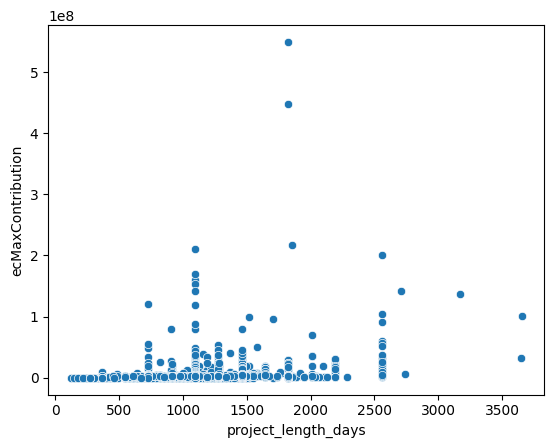

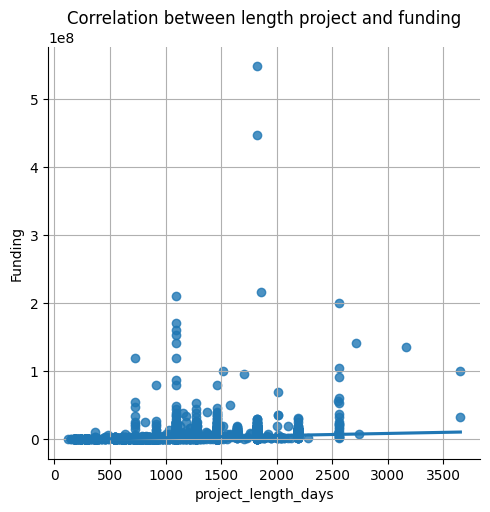

                     project_length_days  ecMaxContribution
project_length_days                 1.00               0.18
ecMaxContribution                   0.18               1.00


In [143]:
# Exploration length project and ecMaxContribution
sns.scatterplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
sns.lmplot(x="project_length_days", y="ecMaxContribution", data=fulldf)
plt.title("Correlation between length project and funding")
plt.xlabel("project_length_days")
plt.ylabel("Funding")
plt.grid(True)
plt.show()
print(fulldf[["project_length_days", "ecMaxContribution"]].corr())

(15337, 136)
Lower treshold: -5364727.86, Upper treshold: 8576478.99
Remaining rows after outlier removal: 14547


C:\Users\kian3\AppData\Local\Temp\ipykernel_18464\4096469616.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["log_ecMaxContribution"] = np.log(df_no_outliers["ecMaxContribution"])


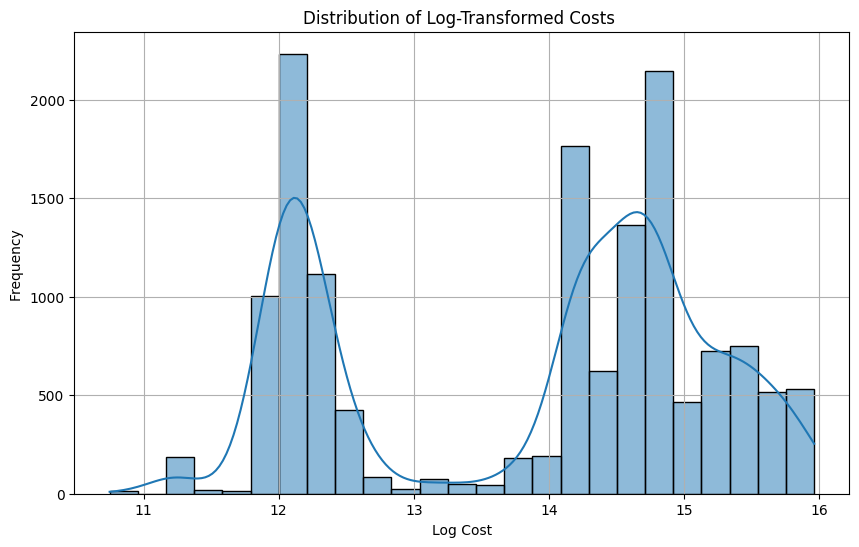

In [144]:
# Preparation XGboost model training on log-transformed target variable (due to high skewness)

# Convert sustainability to boolean
fulldf["sustainability"] = fulldf["sustainability"].astype(bool)

## Perform IQR method to remove outliers in ecMaxContribution
## As it initially left out more than 1000 rows, we choose to use 2*IQR method instead of 1.5*IQR method
import numpy as np
from scipy.stats import iqr
print(fulldf.shape)
iqr = iqr(fulldf["ecMaxContribution"]) 
lower_treshold = np.quantile(fulldf["ecMaxContribution"], 0.25) - 2*iqr 
upper_treshold = np.quantile(fulldf["ecMaxContribution"], 0.75) + 2*iqr
print(f"Lower treshold: {lower_treshold}, Upper treshold: {upper_treshold}")
# Identify outliers 
outliers = fulldf[(fulldf["ecMaxContribution"]<lower_treshold) | (fulldf["ecMaxContribution"] > upper_treshold)]
df_no_outliers = fulldf[((fulldf["ecMaxContribution"]>lower_treshold) & (fulldf["ecMaxContribution"] < upper_treshold))]
print(f"Remaining rows after outlier removal: {len(df_no_outliers)}")

## Perform log transformation on the target variable
import numpy as np
df_no_outliers["log_ecMaxContribution"] = np.log(df_no_outliers["ecMaxContribution"])
# Check the distribution of the log-transformed target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['log_ecMaxContribution'], kde=True)
plt.title("Distribution of Log-Transformed Costs ")
plt.xlabel("Log Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()

In [ ]:
# XGBoost model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

X = df_no_outliers.drop(columns=["ecMaxContribution", 'log_ecMaxContribution'])
y = df_no_outliers["log_ecMaxContribution"]

# Data Preprocessing using ColumnTransformer
categorical_features = ['legalBasis', 'fundingScheme', 'scientific_domain', 'sustainability', 'problem_type']
numerical_features = ['project_length_days', 'number_of_organizations', "proportion_of_small_and_medium_orgs"] + topic_columns + impact_columns + continents_columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

bayes_search = BayesSearchCV(
    XGBRegressor(objective="reg:squarederror", random_state=42, enable_categorical=True),
    search_spaces={
        'n_estimators': Integer(50, 2000),          
        'max_depth': Integer(3, 25),              
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.4, 1.0),       
        'gamma': Real(0.0, 1.0),                  
        'reg_alpha': Real(0.0, 3.0),              
        'reg_lambda': Real(0.0, 2.0),             
    },
    n_iter=120, 
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)


pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor_bayes_search', bayes_search)])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipeline.fit(X_train, y_train)
bayes_best = pipeline.named_steps['regressor_bayes_search'].best_estimator_
best_params_found = pipeline.named_steps['regressor_bayes_search'].best_params_
print("Best parameters found by Bayes Search:")
print(best_params_found)

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

pipeline_preds_log = pipeline.predict(X_test)
# Inverse the log transformation to get the original scale
pipeline_preds = np.exp(pipeline_preds_log)
# Inverse the log transformation to get the original scale for y_test
y_test_exp = np.exp(y_test)
# Calculate the MAE, MSE, and RMSE on the test set
bayes_mae = mean_absolute_error(y_test_exp, pipeline_preds)
bayes_mse = mean_squared_error(y_test_exp, pipeline_preds) 
bayes_rmse = np.sqrt(bayes_mse)
print("Bayes Search Test MAE:", bayes_mae)
print("Bayes Search Test MSE:", bayes_mse)
print("Bayes Search Test RMSE:", bayes_rmse)

c:\Users\kian3\MDA\Project\project\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\kian3\MDA\Project\project\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


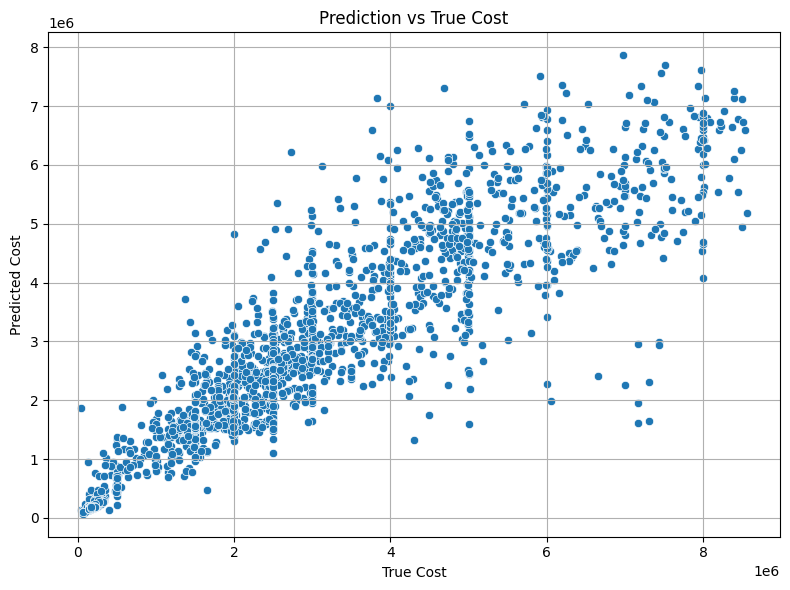

Correlation between True Cost and Predicted Cost: 0.88


In [159]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=pipeline_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, pipeline_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")



In [161]:
df_no_outliers["ecMaxContribution"].describe()

count     14547.00
mean    2020646.58
std     1963871.20
min       46594.00
25%      206887.68
50%     1500000.00
75%     2727592.10
max     8555016.25
Name: ecMaxContribution, dtype: float64

                                       Feature  Importance
176  cat__fundingScheme_HORIZON-TMA-MSCA-PF-EF        0.28
163         cat__fundingScheme_HORIZON-ERC-POC        0.12
131                cat__legalBasis_HORIZON.1.2        0.11
162             cat__fundingScheme_HORIZON-ERC        0.04
177  cat__fundingScheme_HORIZON-TMA-MSCA-PF-GF        0.04
..                                         ...         ...
116                         num__impact_policy        0.00
101                        num__impact_applied        0.00
111                num__impact_global_security        0.00
104                       num__impact_clinical        0.00
117                      num__impact_political        0.00

[260 rows x 2 columns]


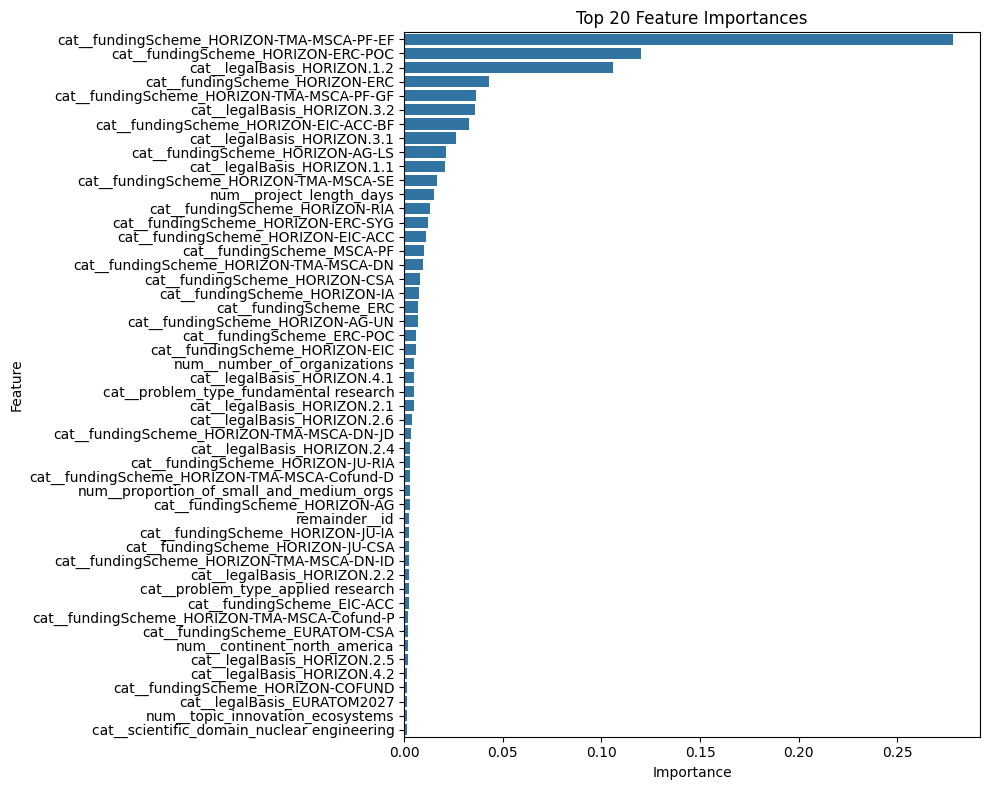

In [160]:
trained_regressor = pipeline.named_steps['regressor_bayes_search'].best_estimator_

# Get the feature importances
importances = trained_regressor.feature_importances_

# Get the feature names after preprocessing
# This requires inspecting the ColumnTransformer's output features
preprocessor = pipeline.named_steps['preprocessor']

# Get names of numerical features (these remain the same after StandardScaler)
num_features_out = numerical_features

# Get names of one-hot encoded categorical features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names in the order they are presented to the regressor
all_feature_names = list(preprocessor.get_feature_names_out())


# Create a Series for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df) # Print top 10 most important features

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(50))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

feature_importance_df.to_csv("feature_importance.csv", index=False)

